# Fit a Polynomial

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'axes.labelcolor':'white', 'ytick.color':'white'});

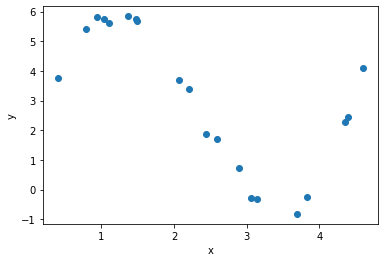

In [23]:
url = 'https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day03/polyfit_data.csv'
df = pd.read_csv(url)
x = df['x'].values
y = df['y'].values
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Exercice 1:
1) Compute the Design matrix :
$ \begin{bmatrix} 1 & x_{1} & x_{1}^2 & \cdots & x_{1}^M \\ 1 & x_{2} &
    x_{2}^2 & \cdots & x_{2}^M \\ \vdots & & \ddots & & \vdots \\ 1 & x_{N} & x_{N}^2 & \cdots & x_{N}^M \end{bmatrix}$

2) Compute the Least-Square solution : $\mathbf{w} = (X^TX)^{-1}X^TY$

3) Compute the MSE

4) Make a prediction for xplt = np.linspace(0, 5, 100) and plot your polynomial over the data points

5) Try to find the "best" value for M

In [65]:
# Choose any integer value for M
# 1)
M = 10

def design_matrix(x, M):
    x = x.reshape(-1,1)
    bias_col = np.ones((x.shape[0], 1))
    X = bias_col

    for i in range(1, M + 1):
        X = np.hstack([X, x ** i])
    return X

X = design_matrix(x, M)

In [66]:
# 2)
y = y.reshape(-1, 1)
w = np.linalg.inv(X.T@X)@X.T@y
yhat = X@w

In [67]:
# 3)
MSE = np.mean((yhat - y)**2)
print(f"MSE: {MSE}")

MSE: 0.44529539187646633


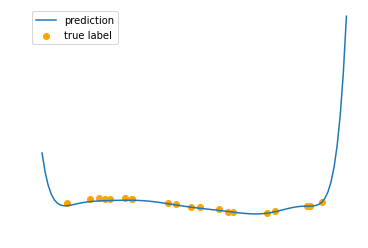

In [69]:
# 4)
xplt = np.linspace(0, 5, 100)
yplt = design_matrix(xplt, M)@w

plt.figure()
plt.plot(xplt, yplt, label="prediction")
plt.scatter(x, y, color="orange", label="true label")
plt.legend()
plt.show()

In [90]:
# 5)

def print_mse_and_plot(M, x, y):
    X = design_matrix(x, M)
    y = y.reshape(-1, 1)
    w = np.linalg.inv(X.T@X)@X.T@y
    yhat = X@w
    MSE = np.mean((yhat - y)**2)
    print(f"MSE: {MSE}")

    xplt = np.linspace(0, 5, 100)
    yplt = design_matrix(xplt, M)@w

    plt.figure()
    plt.plot(xplt, yplt, label="prediction")
    plt.scatter(x, y, color="orange", label="true label")
    plt.legend()
    plt.show()

MSE: 0.031675887665315844


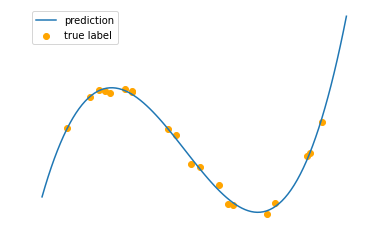

In [87]:
print_mse_and_plot(4, x, y)

MSE: 0.0250395372016896


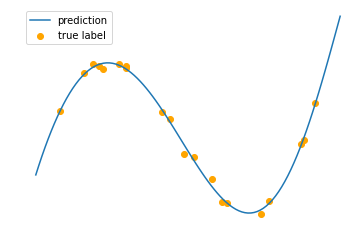

In [88]:
print_mse_and_plot(6, x, y)

MSE: 0.024276367306899062


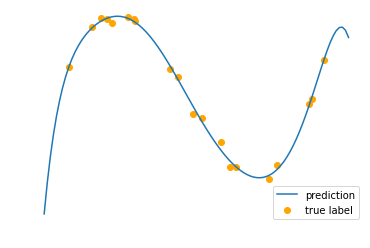

In [91]:
print_mse_and_plot(8, x, y)

### Exercise 2: Solve the same questions with sklearn